# Demonstartion of aqua capabilities on Lumi

### Content

1. [AQUA Reader: Streamlined Data Access](#aqua-reader-streamlined-data-access)

    1.1. [Accessor capabilities](#enhancing-xarray-with-aquas-aqua-accessor)
    
    1.2. [Regridding Functionality in the Reader](#regridding-functionality-in-the-reader)
    
    1.3. [Vertical Interpolation in AQUA](#vertical-interpolation-in-aqua)

    1.4. [Time Averaging with the Reader](#time-averaging-with-the-reader)

    1.5. [Computing Spatial Averages Using `fldmean`](#computing-spatial-averages-using-fldmean)

2. [Plotting capabilities](#aqua-visualization-capabilities)

5. [etc?]()

[Go to the end of file](#the-end)

#### AQUA Reader: Streamlined Data Access

The AQUA Reader simplifies accessing and processing data from various sources, including FDB and intake catalogs, delivering xarray objects. It supports essential operations like interpolation, regridding, averaging, and metadata correction. For scenarios requiring streaming, a streaming emulator is provided.

##### Features:
- **Direct Data Exploration**: Use `inspect_catalogue` to navigate through datasets categorized by models, experiments, and sources.
- **Efficient Operations**: Leverages tools like `smmregrid` for fast, in-memory data processing, with support for Dask parallelization.
- **Automatic Weight Generation**: For regridding tasks, weights are auto-generated and reused, enhancing operation speed.
erated and saved.
- **Spatial and Temporal Aggregation**: With AQUA's xarray foundation, users can easily perform aggregations. AQUA also automates the computation or loading of dataset grid point areas for accurate area-weighted averages.

##### Learn More:
For instructions, examples, and customization tips, visit the [AQUA documentation](https://github.com/DestinE-Climate-DT/AQUA/blob/main/docs/sphinx/source/core_components.rst). Explore practical use cases in our example notebooks: [reader](https://github.com/DestinE-Climate-DT/AQUA/blob/main/notebooks/reader/datasets_lumi.ipynb), [regrid](https://github.com/DestinE-Climate-DT/AQUA/blob/main/notebooks/reader/regrid.ipynb), [timmean](https://github.com/DestinE-Climate-DT/AQUA/blob/main/notebooks/reader/timmean.ipynb), [fldmean](https://github.com/DestinE-Climate-DT/AQUA/blob/main/notebooks/reader/fldmean.ipynb), [vertinterp](https://github.com/DestinE-Climate-DT/AQUA/blob/main/notebooks/reader/vertinterp.ipynb).


## Enhancing Xarray with AQUA's 'aqua' Accessor

AQUA introduces a powerful 'aqua' accessor to Xarray, streamlining the process of accessing a wide range of reader class functions and methods directly from Xarray DataArray or Dataset objects. This integration allows these functions and methods to be used as if they were inherent to Xarray, providing a more intuitive and seamless user experience.

#### Available Functions and Methods
The 'aqua' accessor opens up access to an extensive suite of functions and methods tailored for visualization, analysis, and data processing, including:

- **Visualization and Analysis Functions:** 
  - `plot_single_map()`
  - `area_selection()`
- **Data Processing Reader Methods:** 
  - `regrid()`
  - `timmean()`
  - `fldmean()`
  - `vertinterp()`
  - `stream()`

#### Learn More
For a comprehensive understanding of the 'aqua' accessor's capabilities and how to leverage them effectively in your workflows, please consult the [AQUA accessor documentation](https://github.com/DestinE-Climate-DT/AQUA/blob/main/docs/sphinx/source/core_components.rst) or explore our detailed examples in the [AQUA accessor notebook](https://github.com/DestinE-Climate-DT/AQUA/blob/main/notebooks/reader/accessor.ipynb).

In [1]:
from aqua import Reader
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly", regrid="r200")
data = reader.retrieve(var='2t')

2024-02-07 11:51:52 :: Reader :: ERROR    -> The requested deafult fixer name IFS-NEMO-default does not exist in fixes files
2024-02-07 11:51:52 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-02-07 11:51:55 :: Reader :: WARNING  -> Grid file is not defined, retrieving the source itself...
/LUMI_TYKKY_enQ4Hkr/miniconda/envs/env1/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
2024-02-07 11:52:04 :: Reader :: WARNING  -> Weights file not found: /pfs/lustrep3/projappl/project_465000454/data/AQUA/weights/weights_IFS-NEMO_historical-1990_lra-r100-monthly_ycon_r200_l2d.nc
2024-02-07 11:52:04 :: Reader :: WARNING  -> Attempting to generate i

### Regridding Functionality in the Reader

The Reader includes regridding capabilities, utilizing sparse matrix multiplication to efficiently transform data between different grid resolutions.

#### Key Points:
- **Weight Generation**: Initially, the regridder generates interpolation weights, a process required only once per grid configuration. These weights are then reused for subsequent regridding operations.
- **Configuration**: The `config/machines/<machine-name>/regrid.yaml` file specifies the storage directory for these weights and lists predefined target grids (e.g., "r100" for a 1° regular grid). Users can add new target grids within this file.
- **CDO Integration**: Weights are generated using CDO, necessitating its presence in your environment for weight generation only. The path to CDO can be configured in `config/config.yaml`, or the system `$PATH` is used by default.
- **3D Weights**: Due to their computational and memory demands, generating 3D weights should be performed on a dedicated node. For example, generating weights for FESOM NG5 data might require up to 170 GB of memory and approximately 10 minutes using 16 parallel processes.
- **Sharing Weights**: Precomputed weights can be shared within a research group to avoid redundant computations, stored as specified in `regrid.yaml`.
- **External Tools**: For regridding operations, the [smmregrid](https://github.com/jhardenberg/smmregrid) module is required.

This streamlined approach to regridding ensures efficient data processing, making it an essential tool for researchers working with varying data resolutions.


In [7]:
data['2t'].isel(time=slice(0,100)).aqua.regrid()

<xarray.DataArray '2t' (time: 100, lat: 90, lon: 180)>
dask.array<reshape, shape=(100, 90, 180), dtype=float64, chunksize=(12, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 ... 1998-04-01
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes: (12/21)
    GRIB_paramId:                    167
    long_name:                       2 metre temperature
    GRIB_stepUnits:                  1
    GRIB_gridDefinitionDescription:  150
    GRIB_typeOfLevel:                heightAboveGround
    standard_name:                   air_temperature
    ...                              ...
    GRIB_NV:                         0
    gridtype:                        healpix
    GRIB_shortName:                  2t
    GRIB_units:                      K
    GRIB_dataType:                   fc
    regridded:                       1

### Vertical Interpolation in AQUA

The vertical interpolation is available through AQUA. The functionality is integrated into the `Reader` class, serving essentially as a convenient wrapper around the powerful `interp()` function provided by Xarray.


In [18]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="hourly-r025-atm3d", regrid="r100")
data = reader.retrieve()
data['t'].isel(time=slice(0,100)).aqua.vertinterp(levels=253, vert_coord='plev', units='hPa')

/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/timeutil.py:169: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tsr = ts.resample(chunkfreq)
/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/timeutil.py:169: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tsr = ts.resample(chunkfreq)
/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/aqua/gsv/intake_gsv.py:314: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  self._da = self._da.drop('valid_time')
2024-02-07 12:07:41 :: Reader :: WARNING  -> Converting vert_coord units to interpolate from Pa to hPa
/LUMI_TYKKY_enQ4Hkr/miniconda/envs/env1/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.sp

<xarray.DataArray 't' (time: 100, lat: 721, lon: 1440)>
dask.array<chunked_aware_interpnd, shape=(100, 721, 1440), dtype=float64, chunksize=(6, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-01-05T03:00:00
    idx_level  float64 10.06
    plev       int64 253
Attributes: (12/31)
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    ...                                       ...
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    gridtype:                                 regular_ll
    history:                                  \n2024-02-07 12:07:41 AQUA💧: In...

### Time Averaging with the Reader

The Reader offers functionality to handle datasets not aligned with the desired time frequency through the `timmean()` method. This method allows for time averaging at specified frequencies to match your analytical needs.

#### Available Frequencies:
- **Hourly**
- **Daily**
- **Monthly**
- **Yearly**

Note: While it's theoretically feasible to configure time averaging during the instantiation of the Reader, doing so might not always be the most efficient approach.


In [27]:
reader.timmean(data['t'].isel(plev=0).isel(time=slice(0,100)), freq='3H')

/LUMI_TYKKY_enQ4Hkr/miniconda/envs/env1/lib/python3.11/site-packages/xarray/core/groupby.py:534: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(


<xarray.DataArray 't' (time: 34, lat: 721, lon: 1440)>
dask.array<stack, shape=(34, 721, 1440), dtype=float64, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
    idx_level  int64 18
    plev       float64 1e+05
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-01-05T03:00:00
Attributes: (12/31)
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    ...                                       ...
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    gridtype:                                 regular_ll
    history:                                  \n2024-02-07 12:10:28 AQUA💧: re...

In [37]:
data.aqua.timmean(freq="Y")

2024-02-07 13:35:19 :: frequency_string_to_pandas :: WARNING  -> You are using a pandas frequency pointing at the end of a period, this can behave unexpectedly if you have subdaily data
/LUMI_TYKKY_enQ4Hkr/miniconda/envs/env1/lib/python3.11/site-packages/xarray/core/groupby.py:534: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


<xarray.Dataset>
Dimensions:  (time: 10, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1990-12-31 1991-12-31 ... 1999-12-31
Data variables:
    2t       (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2024-02-07 12:36:28 AQUA💧: Retrieved from IFS-NEMO_historical...

### Computing Spatial Averages Using `fldmean`

The `fldmean` method enables us to generate a time series of global averages directly from our data.

#### Steps for Computation:
1. **Grid Area Calculation**: By instantiating the reader, grid areas are automatically calculated and stored within the reader object. This step is essential for accurate spatial operations, and it's done implicitly when you initialize the reader.

2. **Working with Original Data**: In cases where no regridding is specified, the reader defaults to using the original dataset. This approach assumes that the initial data format is suitable for our analysis needs.

3. **Extracting Time Series**:
   - We aim to extract a concise time series from the available fields. 
   - It's important to note that the first data frame might be invalid or incomplete, so it should be handled or skipped accordingly.

By following these steps, we can efficiently process and analyze spatial data, making use of the `fldmean` method to obtain meaningful global averages over time.


2024-02-07 12:36:21 :: Reader :: ERROR    -> The requested deafult fixer name IFS-NEMO-default does not exist in fixes files
2024-02-07 12:36:21 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
/LUMI_TYKKY_enQ4Hkr/miniconda/envs/env1/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


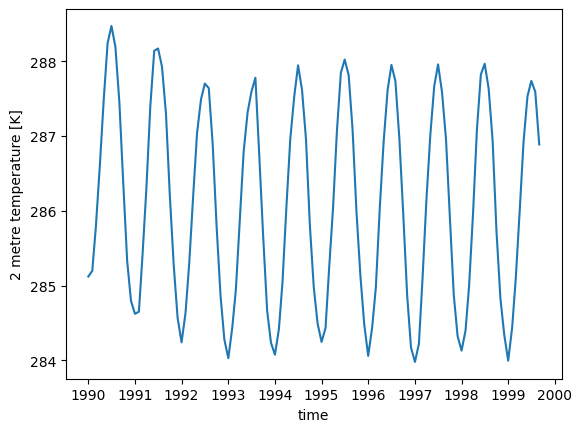

In [33]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly")
data = reader.retrieve(var='2t')
data['2t'].aqua.fldmean().plot()

## AQUA Visualization Capabilities

Although AQUA is not designed to provide a comprehensive suite of visualization tools, it does feature a simple and efficient mapping utility.

To take advantage of this utility, users are not required to dive deep into the complexities of Cartopy or Matplotlib. The utility is crafted to offer a user-friendly interface that requires minimal input, focusing on delivering clear and informative maps with ease. Whether you're looking to quickly visualize spatial data distributions or integrate geographical representations into your data analysis, AQUA's mapping utility provides a reliable and straightforward solution.

For detailed instructions on how to use this utility, including examples and customization options, please refer to the [AQUA documentation](https://github.com/DestinE-Climate-DT/AQUA/blob/main/docs/sphinx/source/graphics.rst) or explore our [example notebooks](https://github.com/DestinE-Climate-DT/AQUA/blob/main/notebooks/graphics/single_map.ipynb) for practical demonstrations.

2024-02-07 12:11:57 :: Reader :: ERROR    -> The requested deafult fixer name IFS-NEMO-default does not exist in fixes files
2024-02-07 12:11:57 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
/LUMI_TYKKY_enQ4Hkr/miniconda/envs/env1/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


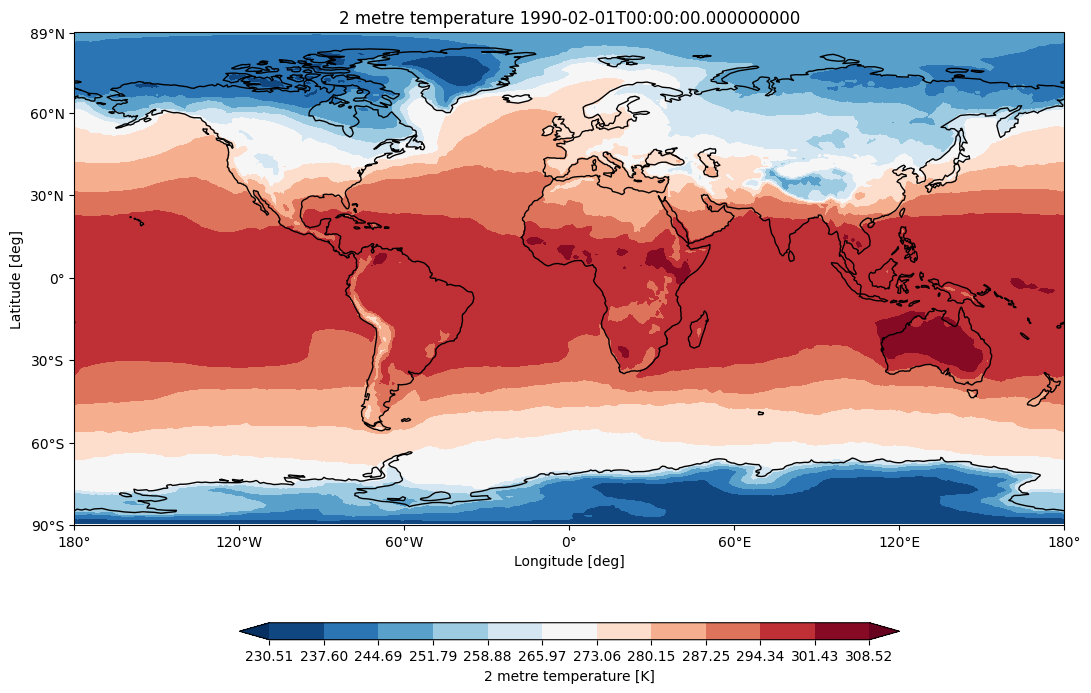

In [29]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly", regrid="r200")
data = reader.retrieve(var='2t')
data['2t'].isel(time=1).aqua.plot_single_map()

##### The end